# Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Read in Data

In [2]:
# Set working directory
%cd C:/Users/sriha/OneDrive/Desktop/DS/My work/life-expectancy

# Unpickle preprocessed training data
X_train = pd.read_pickle('Data/X_train_clean.pkl')

# Unpickle train target variable
y_train = pd.read_pickle('Data/y_train.pkl')

C:\Users\sriha\OneDrive\Desktop\DS\My work\life-expectancy


In [3]:
# Combine X and y for visualization and to determine correlations
df_train = X_train.join(y_train)
df_train

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
264,Belize,2007,Developing,181.0,8.5,7.24,69.630510,96.00,0,10.0,...,4.76,96.0,0.6,4324.876427,29847.0,3.5,3.5,0.700,12.8,69.6
2203,Samoa,2012,Developing,136.0,7.5,0.01,492.055226,64.00,1,9.0,...,5.20,64.0,0.1,4234.554443,189194.0,0.2,0.1,0.698,12.9,73.2
580,Colombia,2011,Developing,144.0,12.0,4.37,184.307362,85.00,6,14.0,...,6.64,85.0,0.1,7227.739680,4646646.0,2.2,2.0,0.700,13.0,74.2
220,Barbados,2003,Developing,121.0,9.0,7.65,13.513992,91.00,0,10.0,...,5.82,89.0,0.4,1228.544700,1458821.0,4.1,4.1,0.753,14.2,73.7
2730,Ukraine,2015,Developing,195.0,4.0,8.06,0.000000,22.00,105,5.0,...,6.63,23.0,0.2,2124.662666,4515429.0,2.3,2.4,0.748,15.3,71.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2680,Tunisia,2000,Developing,112.0,4.0,1.21,264.784220,94.00,47,5.0,...,5.40,97.0,0.1,2213.914880,9699197.0,6.6,6.5,0.646,12.8,72.9
1922,Norway,2003,Developed,78.0,9.0,6.04,880.738062,85.75,8,10.0,...,9.85,92.0,0.1,5111.654450,4564855.0,0.8,0.7,0.918,17.1,79.4
2907,Zambia,2014,Developing,314.0,28.0,0.01,196.667577,86.00,9,41.0,...,4.99,86.0,4.3,1738.882200,1562974.0,6.3,6.2,0.570,12.5,61.1
2274,Serbia,2006,Developing,133.0,1.0,8.58,541.824347,93.00,2,1.0,...,8.99,92.0,0.1,4129.758741,7411569.0,2.5,2.5,0.739,13.4,73.6


# Define Function to Visualize Data

In [4]:
def plot_feature(data, column):
  '''
  Make plots for 'column'
  Left: Distribution of feature
  Right: Dependance of sale price on the feature
  '''
  sns.set_style('whitegrid')
  plt.figure(figsize = (16, 6))
  plt.subplot(1, 2, 1)

  order = data.groupby(by=[column])['Life expectancy '].mean().sort_values().index

  if data[column].dtype == 'int64' or data[column].dtype == 'float64':
    sns.distplot(data[column])
  else:
    sns.countplot(x=column, 
                  data=data,
                  order=order) 

  plt.xlabel(column, fontsize=14)
  plt.xticks(rotation=0, fontsize=12)
  plt.ylabel('Count', fontsize=14)

  
  plt.subplot(1, 2, 2)

  if data[column].dtype == 'int64' or data[column].dtype == 'float64':
    sns.regplot(x=column, 
                y='Life expectancy ', 
                data=data,
                scatter_kws={'alpha':0.2})
  else:
    sns.boxplot(x = column,
                y = 'Life expectancy ', 
                data=data,
                order = order)

  plt.xlabel(column, fontsize=14)
  plt.xticks(rotation=0, fontsize=12)
  plt.ylabel('Life expectancy ', fontsize=14)
  plt.subplots_adjust(wspace=.4)
  plt.show()


def heatmap(corr_matrix):
  sns.clustermap(corr_matrix,
                 annot=False,
                 cmap='Blues')
  plt.show()

# Visualizations and Observations

### 1. Some expected trends:

- Life expectancy is _inversely correlated_ with **adult mortality**, **infant mortality**, **under-five deaths**, as well as **incidence of HIV/AIDS and measles**.

- **Thinness in children and teenagers** is also _inversely correlated_ with life expectancy. This also tells us that thinness here could indicate lack of access to adequate nutrtion. 

- Life expectancy is _directly corelated_, to varying degrees, with **expenditure on healthcare**, **GDP**, **level of schooling** and **immunization against hepatitis B, polio and diptheria**. 

- Life expectancy tends to be _higher_ in developed countries. 


### 2. An unexpected result:

- Life expectancy is _directly correlated_ (albeit very weakly) with **net alcohol consumption per capita**. The expectation would be that alcohol consumption reduces life expectancy, but maybe there is more to it than a simple correlation. 

### 3. Correlations:

- Many of the features only seem to be _weakly_ correlated to the _target variable_. This gives us a starting point to decide whether to later drop some of these features.

- On the other hand, some features are very _strongly_ correlated with _each other_. These will need to be accounted for to avoid multicollinearity. 


### 4. Observations on frequency distributions:

- Several features are skewed. Since we aim for minimum skew and a normal distribution we will attempt to normalize these features. 

- Features with left-skew: **'Hepatits B'**, **'Polio'**, **'Diptheria'**

- Features with right-skew: **'Adult mortality'**, **'Infant deaths**', **'Under-Five deaths'**, **'Alcohol'**, **'Percentage expediture'**, **'Measles'**, **'HIV/AIDS'**, **'GDP'**, **'Thinness 1-19'**, **'Thinness 5-9'**.

- All the skewed features will need to be normalized before proceeding. 
 
- **Note:** The target feature 'Life expectancy' also has a slight skew, and we may choose to normalize this. This will have to be reversed before the final predictions are made. 

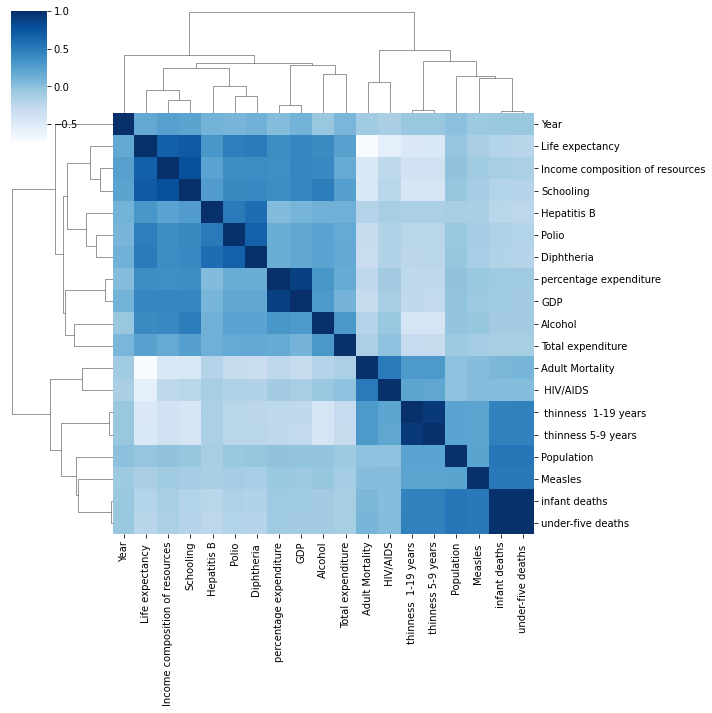

In [5]:
corr1 = df_train.corr()
heatmap(corr1)

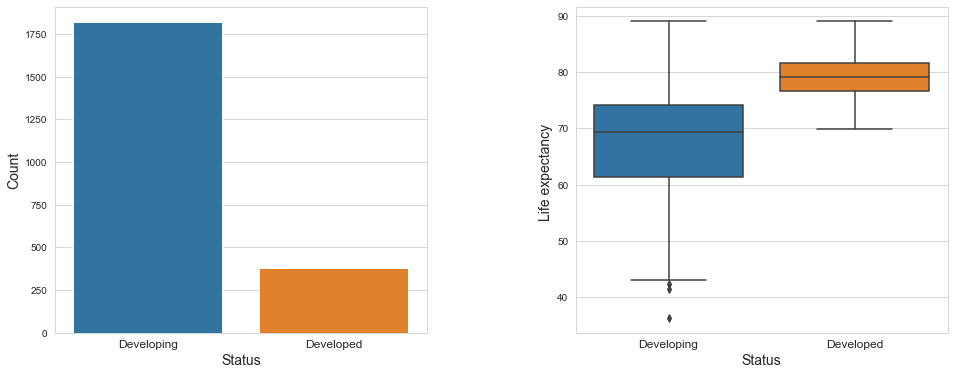

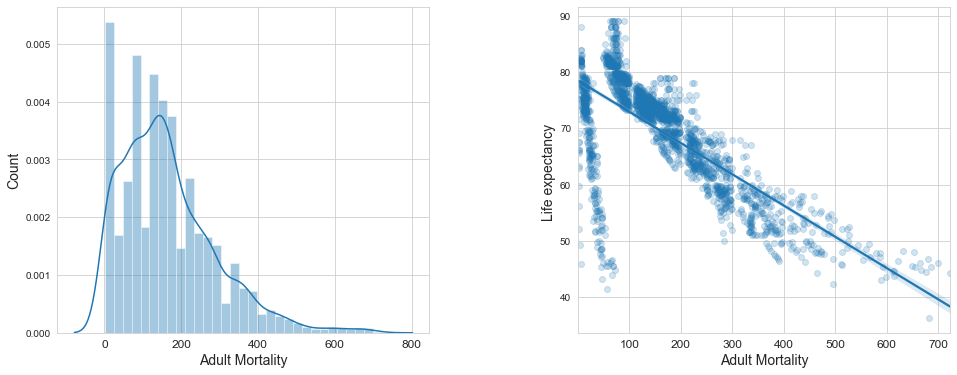

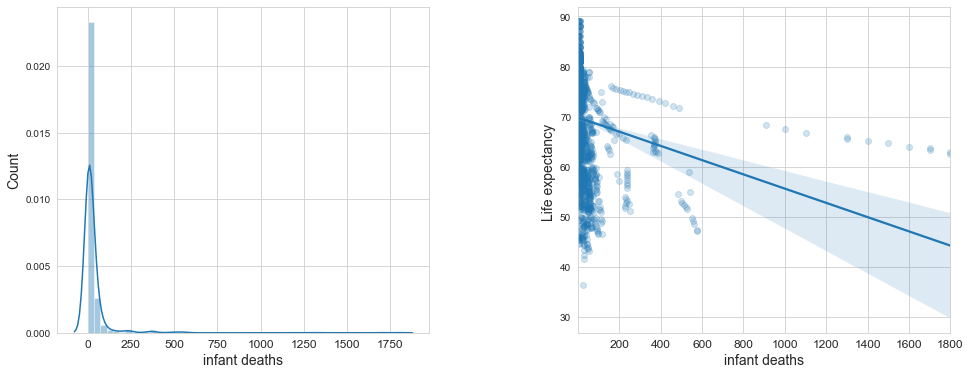

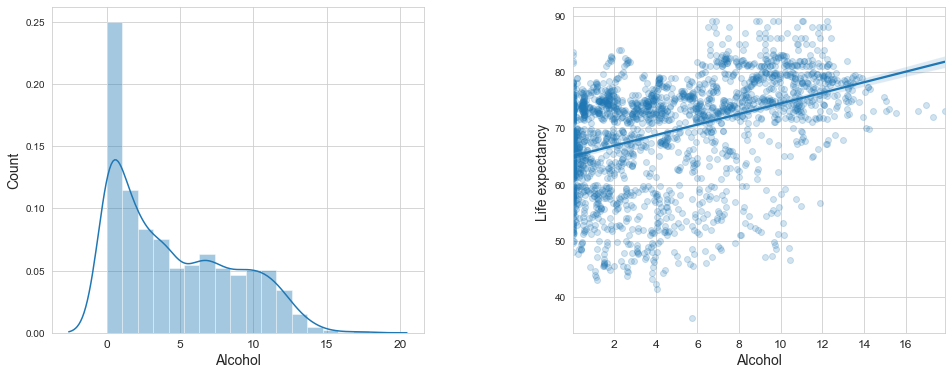

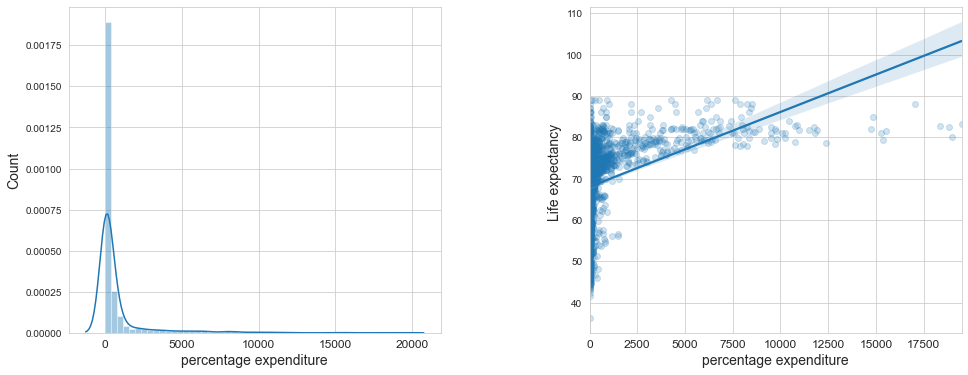

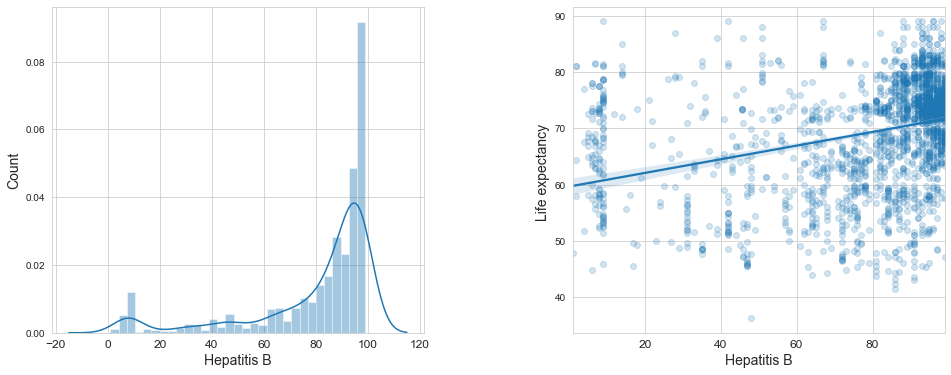

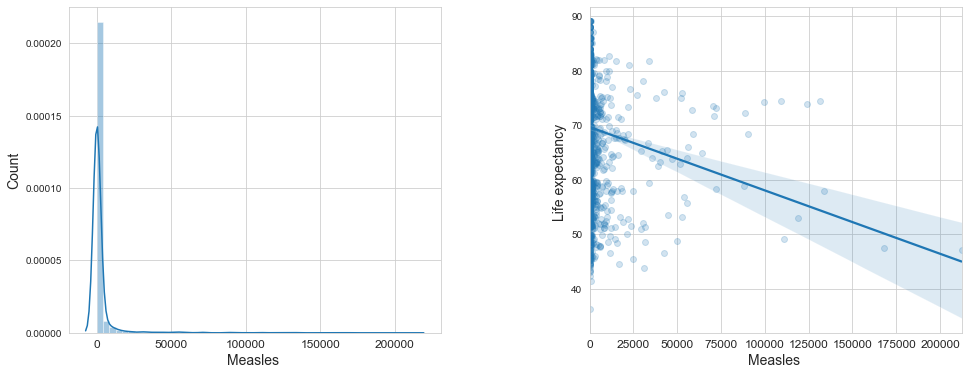

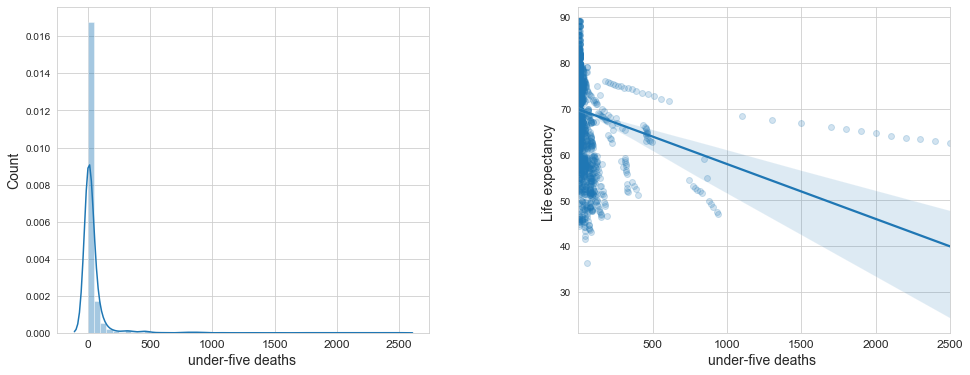

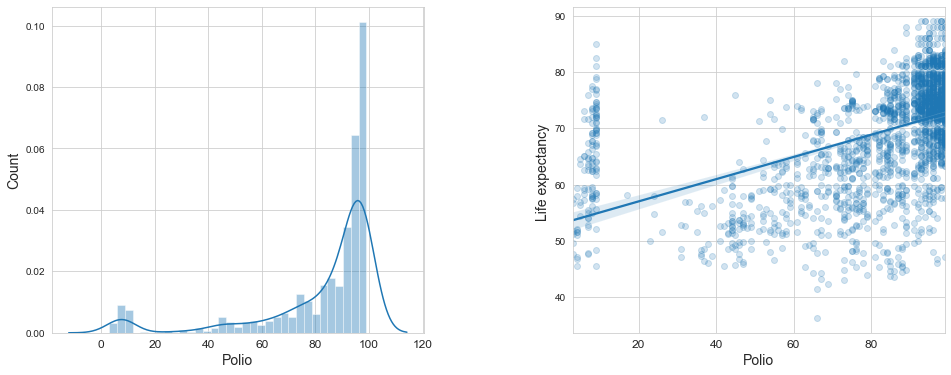

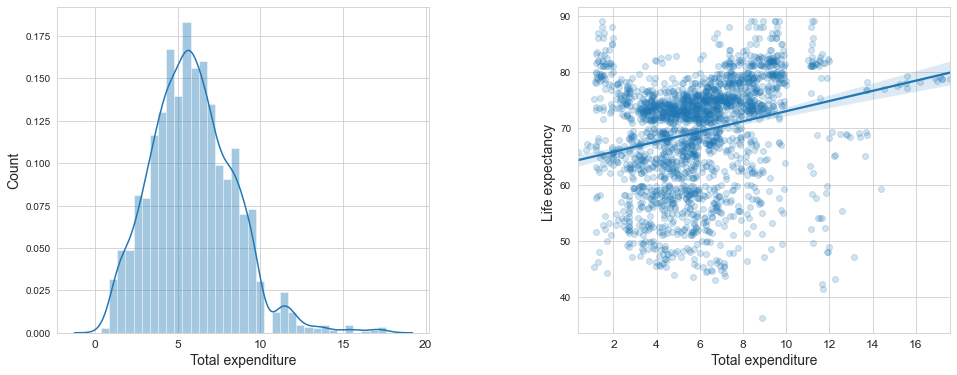

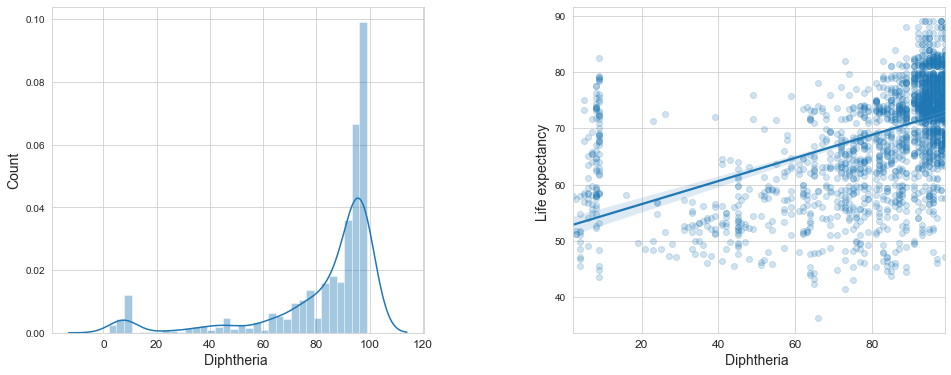

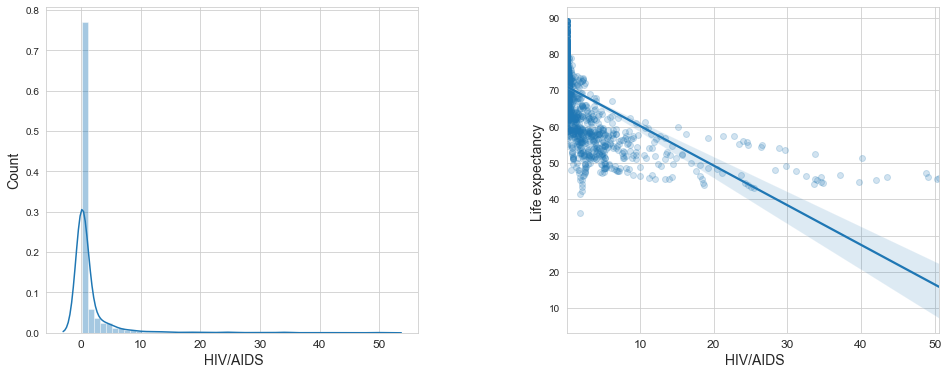

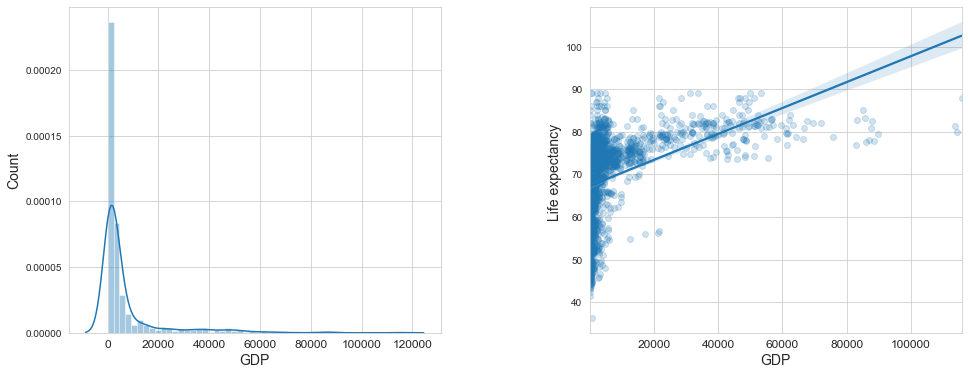

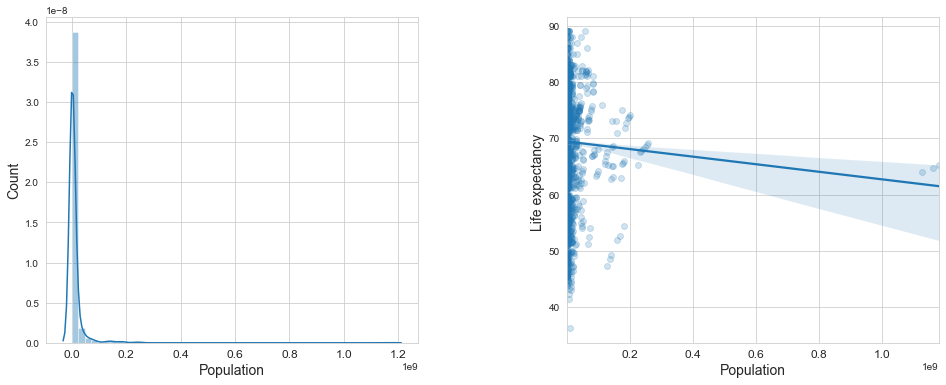

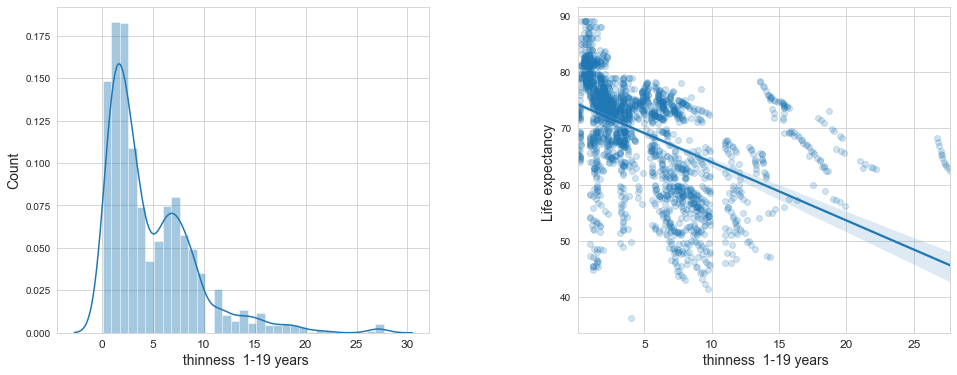

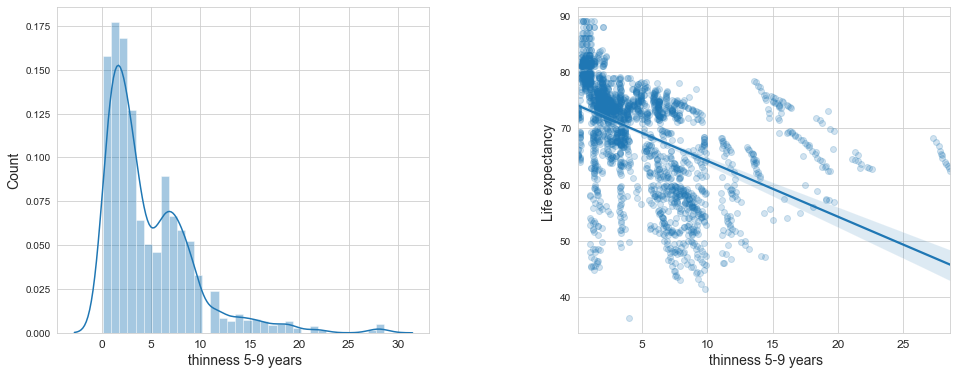

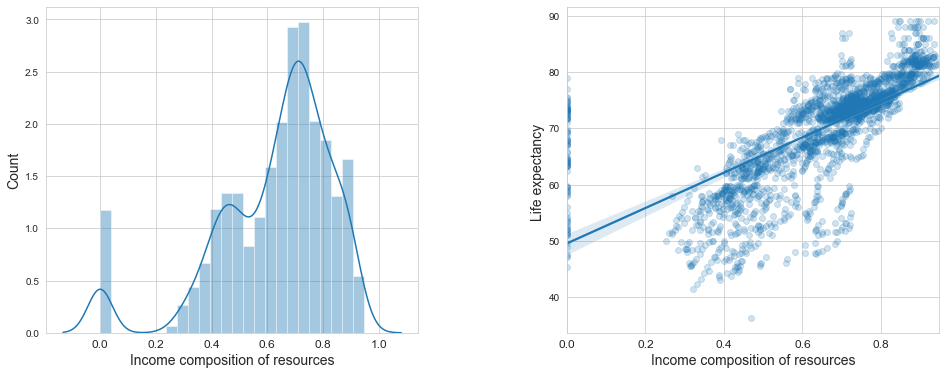

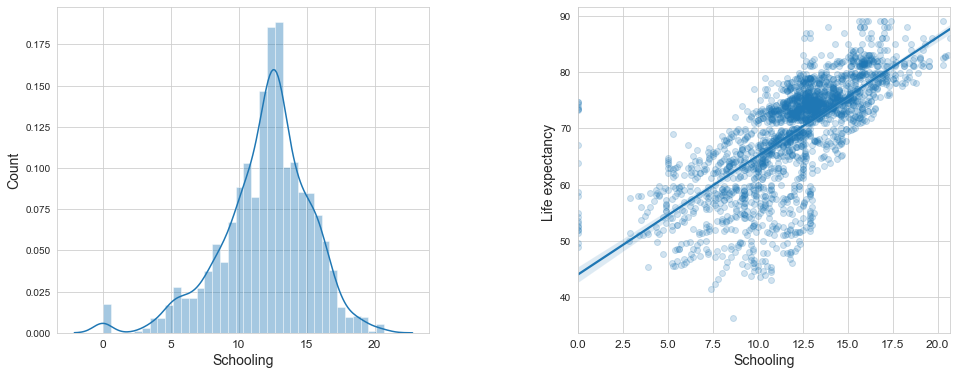

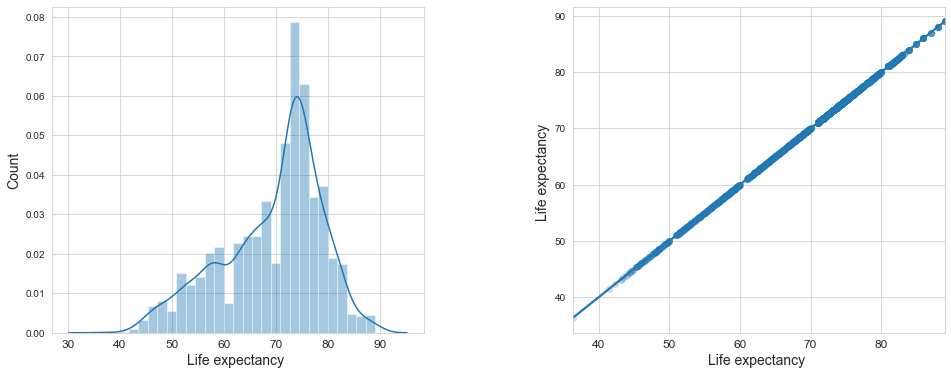

In [6]:
for column in df_train.columns[2:]:#len(df_train.columns)-1]:
    plot_feature(df_train, column)